## Problem: Prepare a model for glass classification using KNN

###### Importing Required Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNC

from sklearn.neighbors import KNeighborsClassifier

###### Dataset Importing

In [34]:
glass = pd.read_csv("F:\\RStudio\\excelR\\assignments\\Assignment 13 KNN\\glass.csv")

###### Understanding The Data

In [35]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


###### EDA

In [37]:
glass.shape

(214, 10)

In [38]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [39]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [40]:
glass.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

###### Cleaning The Data

In [41]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### Univariate Analysis

<AxesSubplot:xlabel='Fe', ylabel='Density'>

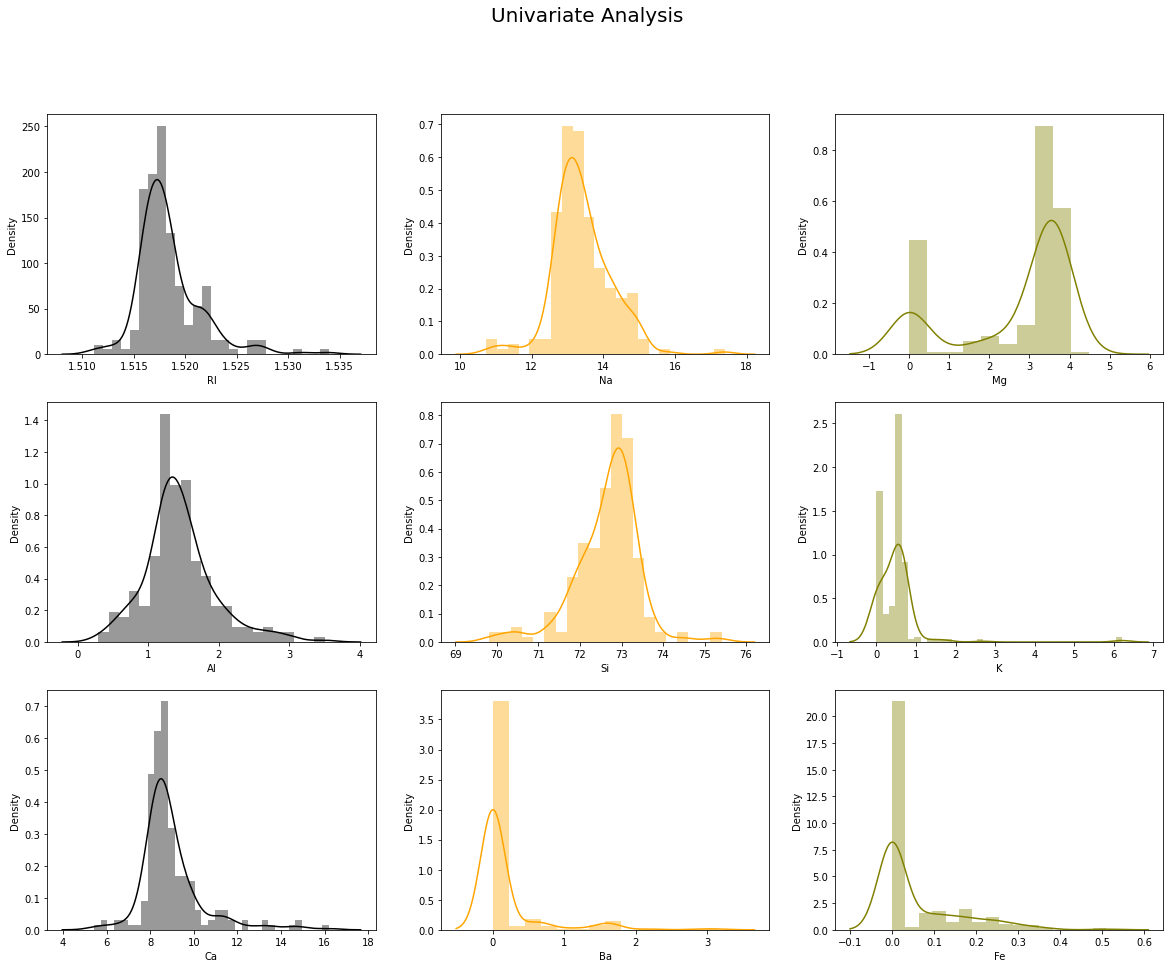

In [42]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(glass['RI'],ax=axes[0,0],color='black')
sns.distplot(glass['Na'],ax=axes[0,1],color='orange')
sns.distplot(glass['Mg'],ax=axes[0,2],color='olive')
sns.distplot(glass['Al'],ax=axes[1,0],color='black')
sns.distplot(glass['Si'],ax=axes[1,1],color='orange')
sns.distplot(glass['K'],ax=axes[1,2],color='olive')
sns.distplot(glass['Ca'],ax=axes[2,0],color='black')
sns.distplot(glass['Ba'],ax=axes[2,1],color='orange')
sns.distplot(glass['Fe'],ax=axes[2,2],color='olive')

Obsevations :

Al, Ca, Ba, K, Fe - Positive Skewness

Na, Si - Approx Normally Distributed


In [43]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


#### Data needs to be split for training and splitting
#### No categorical variables, therefore there is no requirement for label encoding or dummies

### Splitting The Dataset

In [44]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(glass,test_size=0.2)

In [45]:
print(train.shape)

(171, 10)


In [46]:
print(test.shape)

(43, 10)


In [47]:
x_train=train.iloc[:,0:9]
y_train=train.iloc[:,9]

In [48]:
x_test=test.iloc[:,0:9]
y_test=test.iloc[:,9]

In [49]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.8245614035087719, 0.6976744186046512], [0.7719298245614035, 0.6511627906976745], [0.7309941520467836, 0.6046511627906976], [0.7076023391812866, 0.5581395348837209], [0.6783625730994152, 0.5116279069767442], [0.6783625730994152, 0.5581395348837209], [0.6900584795321637, 0.5348837209302325], [0.6900584795321637, 0.4883720930232558], [0.6783625730994152, 0.5116279069767442], [0.6900584795321637, 0.5116279069767442], [0.6900584795321637, 0.5348837209302325], [0.6783625730994152, 0.5116279069767442], [0.6666666666666666, 0.5116279069767442], [0.6491228070175439, 0.5348837209302325], [0.6491228070175439, 0.5116279069767442], [0.6432748538011696, 0.5116279069767442], [0.631578947368421, 0.4883720930232558], [0.6257309941520468, 0.5116279069767442], [0.6257309941520468, 0.5348837209302325], [0.6198830409356725, 0.5348837209302325], [0.6198830409356725, 0.4883720930232558], [0.6081871345029239, 0.5116279069767442], [0.5906432748538012, 0.4883720930232558], [0.5964912280701754, 0.48837209302

#### Visualization

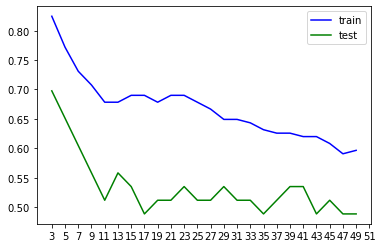

In [50]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"b")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"g")
plt.legend(["train","test"])

plt.xticks(np.arange(3,53,2))
plt.show()

##### Model for k=3

In [51]:
neighbour=KNC(n_neighbors=3)

In [52]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.8245614035087719 0.6976744186046512


##### Model for k=5

In [53]:
neighbour=KNC(n_neighbors=5)

In [54]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.7719298245614035 0.6511627906976745


##### We can take k = 3 as it gives more accuracy

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
y_pred = neighbour.predict(x_test)

In [57]:
confusion_matrix(y_test,y_pred)

array([[13,  3,  0,  0,  0,  0],
       [ 3,  9,  0,  2,  0,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  3]], dtype=int64)

##### classification report

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.68      0.81      0.74        16
           2       0.60      0.64      0.62        14
           3       0.00      0.00      0.00         4
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00         2
           7       0.75      0.75      0.75         4

    accuracy                           0.65        43
   macro avg       0.56      0.59      0.57        43
weighted avg       0.59      0.65      0.62        43



### Model Building

In [65]:
model_fnl = KNeighborsClassifier(n_neighbors=1)

In [66]:
model_fnl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           1       0.67      0.75      0.71        16
           2       0.83      0.71      0.77        14
           3       0.33      0.25      0.29         4
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.80      1.00      0.89         4

    accuracy                           0.72        43
   macro avg       0.72      0.73      0.71        43
weighted avg       0.73      0.72      0.72        43



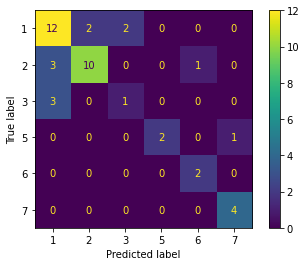

In [67]:
report(model_fnl) 

#### Results :
###### The model was trained using different K values.
###### Training data is biased due to which some categories have good precision and recall scores.
###### The final model had a decent score and would perform well with unseen data as there is a balance between Bias and Variance.

##### Classification report, accuracy = 65%

##### While Model Building, accuracy = 72%
